In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as pl
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.metrics
import sklearn.decomposition
import sklearn.svm
#from sklearn import utils, model selection, preprocessing, model selection, metrics, decomposition
#Example of a Support Vector Machine using sklearn

dataframe = pd.read_excel('c:/users/omar/DATA/default of credit card clients.xls', header=1)
dataframe.rename({'default payment next month':'DEFAULT'}, axis = 'columns', inplace = True)
dataframe.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


For simplicity, the irrelevant columns should be dropped, such as the ID column

In [3]:
dataframe.drop('ID', axis= 1, inplace= True)
dataframe.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Parameters like EDUCATION and MARRIAGE are weighted, but on a scale where 0 represent missing values 
Due to the vast amount of data, we can drop the missing values where EDUCATION-MARRIAGE equals 0
this won't affect the performance because data set is big enought to ignore them.

In [4]:

df_nomiss = dataframe.loc[(dataframe['EDUCATION']!=0) & (dataframe['MARRIAGE']!= 0)]
df_default = df_nomiss[df_nomiss['DEFAULT'] == 0]
df_nodefault = df_nomiss[df_nomiss['DEFAULT'] != 0]

df_def_dws = sk.utils.resample(df_default, replace = False, n_samples = 1000, random_state = 42)
df_nd_dws = sk.utils.resample(df_nodefault, replace = False,n_samples = 1000, random_state = 42)
len(df_def_dws)
len(df_nd_dws)
df_dws = pd.concat([df_def_dws,df_nd_dws])
df_dws.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
641,130000,2,3,1,28,0,0,0,0,-2,...,0,0,0,2500,1000,0,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,35234,32869,33862,7200,7500,1200,1200,1500,1300,0
16004,180000,2,2,1,29,0,0,0,0,0,...,26662,26166,26176,1800,1800,1500,1056,950,1000,0
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,0,0,0,979,412,0,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,81778,83082,84811,3300,3331,3359,2663,2751,3000,0


The next step once the data has been cleaned is to define the dependent and independent variables, the independent variables will be denoted as X, and the dependent variable as y.

We are interested in set the DEFAULT and NO DEFAULT as the dependent variable i.e. 'y', and the remain as X 

In [5]:
X = df_dws.iloc[:,:-1].copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [6]:
y = df_dws['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

Some variables are categorical, so we need to format this categorical data if we want to use a Support Vector Machine. Some algorithms are natively suited for continous data, most of them aren't made for categorical data, but works well once the data is formated.

In [7]:
X_encoded = pd.get_dummies(X, columns= [ 'SEX',
                                       'MARRIAGE',
                                       'EDUCATION',
                                       'PAY_0',
                                       'PAY_2',
                                       'PAY_3',
                                       'PAY_4',
                                       'PAY_5',
                                       'PAY_6'] )
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


In [8]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split( X_encoded, y, test_size= 0.1, random_state= 42 )
x_train_scale = sklearn.preprocessing.scale(x_train)
x_test_scale = sklearn.preprocessing.scale(x_test)


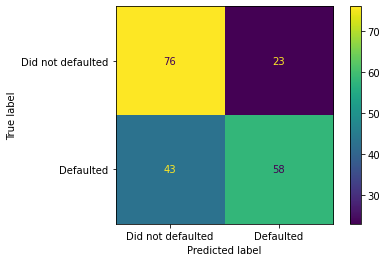

In [10]:
clf_svm = sklearn.svm.SVC(random_state = 42)
clf_svm.fit(x_train_scale, y_train)

sklearn.metrics.plot_confusion_matrix(clf_svm,
                                      x_test_scale,
                                      y_test, values_format = 'd',
                                      display_labels = ['Did not defaulted', 'Defaulted'])